In [1]:
## This excersise is to demonstrate my understanding of stochastic
## gradient descent. I use a random dataset generated by the scikit
## library and make my own loss function. 


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

In [2]:
from sklearn import datasets

In [3]:
X, y = datasets.make_regression(100, 1, noise = 5, bias = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

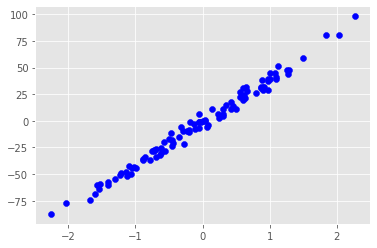

In [4]:
axes = plt.axes() 
axes.scatter(x = X, y = y, c = "blue")

plt.show

In [5]:
grad_test = np.arange(0, 150, 10)
print(grad_test)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140]


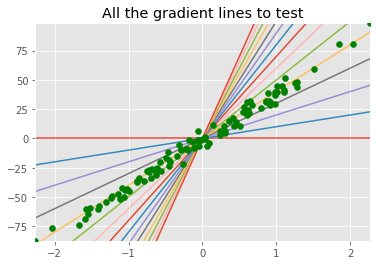

In [6]:
axes = plt.axes() 
X_test = np.linspace(X.min(), X.max())
axes.scatter(x = X, y = y, c = "green", zorder = 1000)

for grad in grad_test:
    grad_y = grad * X_test
    axes.plot(X_test, grad_y)

axes.set_xlim(X.min(), X.max())
axes.set_ylim(y.min(), y.max())

plt.title("All the gradient lines to test")
plt.show()

In [7]:
def simple_ssr_loss(grad, X, y):
    
    ssr = 0 # var to track sum of square residuals 
    
    data = np.stack((X[:, 0], y), axis = 1) # combining x, y data into one list 
    
    
    # we want to loop through all the data and calculate the difference between
    # the line and the point.
    for i in data:
        line_point = i[0] * grad
        diff = line_point - i[1]
        
        ssr = ssr + (diff * diff)
    
    
    return ssr

In [8]:
square_line = [] 
min_ssr = 1e100 
max_grad = 0


In [9]:
for grad in grad_test:
    
    ssr = simple_ssr_loss(grad, X, y)
    
    square_line.append(ssr)
    if ssr < min_ssr:
        min_ssr = ssr 
        min_grad = grad

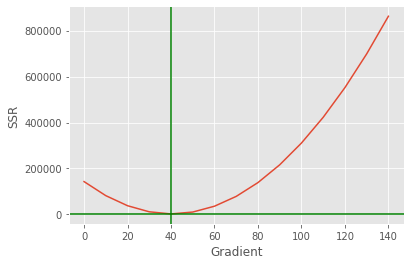

In [10]:
axes = plt.axes() 
plt.plot(grad_test, square_line)
plt.axvline(min_grad, c = "green")
plt.axhline(min_ssr, c = "green")

plt.ylabel('SSR')
plt.xlabel('Gradient')

plt.show()

In [11]:
min_grad

40

<function matplotlib.pyplot.show(close=None, block=None)>

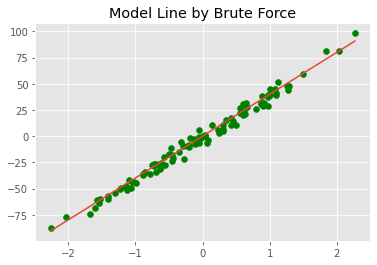

In [12]:
axes = plt.axes()

axes.scatter(x = X, y = y, c = "green")
grad = min_grad

x_line = np.linspace(X.min(), X.max())
y_line = grad * x_line
axes.plot(x_line, y_line)

plt.title("Model Line by Brute Force")
plt.show

In [13]:
# I use scikit-learn's inbuilt functions to also demonstrate my understanding of scikit-learn

model = LinearRegression() 
# model= SGDRegressor() 

In [14]:
model.fit(X, y)

LinearRegression()

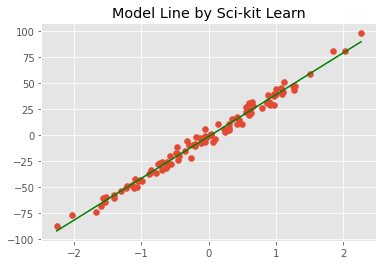

In [15]:
axes = plt.axes()
# plot the data
axes.scatter(x = X, y = y)

slope = model.coef_[0]
intercept = model.intercept_ 

x_line = np.linspace(X.min(), X.max())
y_line = slope * x_line + intercept
axes.plot(x_line, y_line, 'green')

plt.title('Model Line by Sci-kit Learn')

plt.show() 